<a href="https://colab.research.google.com/github/akhunzakp/PCVK_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#3 - Operasi Dasar Pengolahan Citra
# Praktikum Week 3 - Image Processing dan Computer Vision

# Import library yang diperlukan
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import glob
from math import log10, sqrt

# Mount Google Drive
drive.mount('/content/drive')

# =============================================================================
# D1. OPERASI CITRA SEDERHANA
# =============================================================================

# 1. LINEAR BRIGHTNESS TRANSFORMATION (Contoh yang sudah diberikan)
def linear_brightness_transform():
    print("=== LINEAR BRIGHTNESS TRANSFORMATION ===")
    brightness = int(input('Masukkan nilai brightness: '))

    # Load image
    original = cv.imread('/content/drive/MyDrive/Images/female.jpg')
    brightness_img = np.zeros(original.shape, original.dtype)

    # Apply brightness transformation with truncation
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            for k in range(original.shape[2]):
                # Linear brightness formula: g(x,y) = f(x,y) + b
                new_value = int(original[i,j,k]) + brightness
                # Truncate to prevent overflow
                brightness_img[i,j,k] = np.clip(new_value, 0, 255)


    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(brightness_img, cv.COLOR_BGR2RGB))
    plt.title(f'Linear Brightness (+{brightness})')
    plt.axis('off')
    plt.show()

linear_brightness_transform()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== LINEAR BRIGHTNESS TRANSFORMATION ===
Masukkan nilai brightness: 50


AttributeError: 'NoneType' object has no attribute 'shape'

=== INVERSE CITRA ===


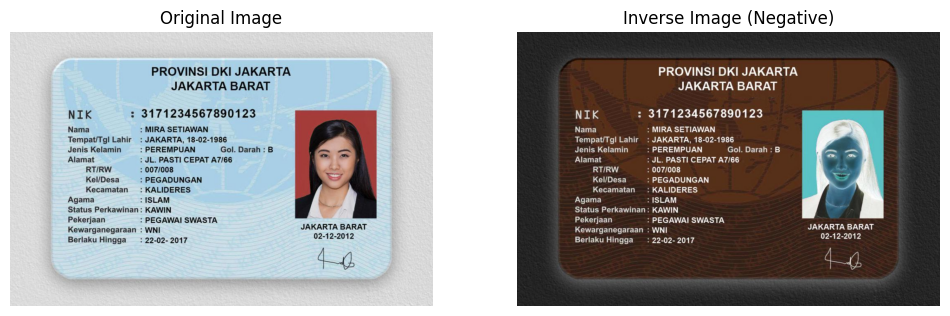

In [ ]:
# TUGAS 1: INVERSE CITRA
def inverse_image():
    print("=== INVERSE CITRA ===")

    # Load image
    original = cv.imread('/content/drive/MyDrive/Images/unnamed.jpg')
    inverse_img = np.zeros(original.shape, original.dtype)

    # Apply inverse transformation
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            for k in range(original.shape[2]):
                # Inverse formula: g(x,y) = 255 - f(x,y)
                inverse_img[i,j,k] = 255 - original[i,j,k]

    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(inverse_img, cv.COLOR_BGR2RGB))
    plt.title('Inverse Image (Negative)')
    plt.axis('off')
    plt.show()

inverse_image()

=== TRANSFORMASI CONTRAST ===
Masukkan nilai contrast (-255 to 255): 50


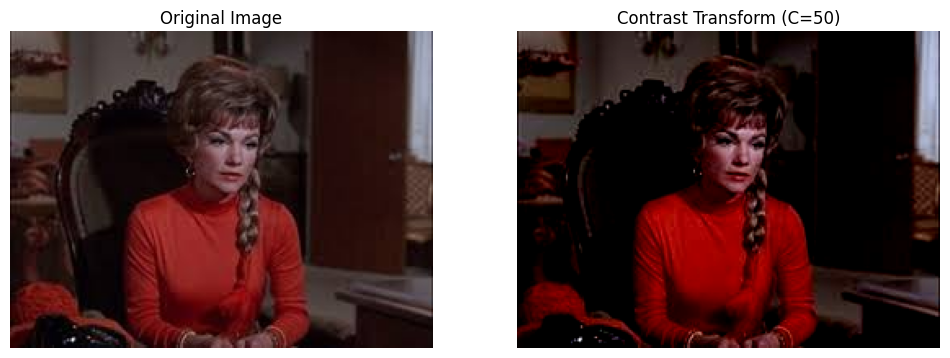

In [ ]:
# TUGAS 2: TRANSFORMASI CONTRAST
def contrast_transform():
    print("=== TRANSFORMASI CONTRAST ===")
    contrast = int(input('Masukkan nilai contrast (-255 to 255): '))

    # Load image
    original = cv.imread('/content/drive/MyDrive/Images/female.jpg')
    contrast_img = np.zeros(original.shape, original.dtype)

    # Calculate contrast correction factor
    # F = 259(C + 255) / 255(259 - C)
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

    # Apply contrast transformation
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            # Process each color channel
            for k in range(original.shape[2]):
                # Contrast formula: R' = F(R - 128) + 128
                new_value = factor * (int(original[i,j,k]) - 128) + 128
                # Truncate to prevent overflow
                contrast_img[i,j,k] = np.clip(new_value, 0, 255)


    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(contrast_img, cv.COLOR_BGR2RGB))
    plt.title(f'Contrast Transform (C={contrast})')
    plt.axis('off')
    plt.show()

contrast_transform()

=== TRANSFORMASI LOGARITHMIC BRIGHTNESS ===
Masukkan nilai konstanta c: 50


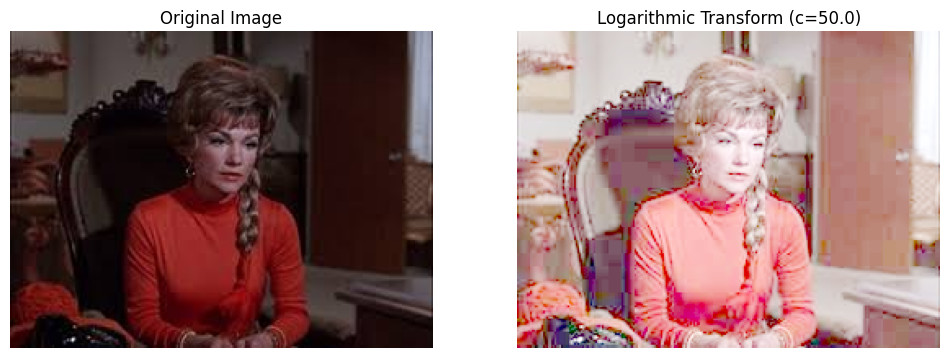

In [ ]:
# TUGAS 3: TRANSFORMASI LOGARITHMIC BRIGHTNESS
def logarithmic_brightness():
    print("=== TRANSFORMASI LOGARITHMIC BRIGHTNESS ===")
    c = float(input('Masukkan nilai konstanta c: '))

    # Load image
    original = cv.imread('/content/drive/MyDrive/Images/female.jpg')
    log_img = np.zeros(original.shape, original.dtype)

    # Apply logarithmic transformation
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            for k in range(original.shape[2]):
                # Log formula: s = c * log(1 + r)
                new_value = c * np.log1p(original[i,j,k]) # Use log1p for log(1+x)
                # Normalize and truncate
                log_img[i,j,k] = np.clip(new_value, 0, 255)


    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(log_img, cv.COLOR_BGR2RGB))
    plt.title(f'Logarithmic Transform (c={c})')
    plt.axis('off')
    plt.show()

logarithmic_brightness()

=== TRANSFORMASI GRAYSCALE ===


/tmp/ipython-input-1652091476.py:23: RuntimeWarning: overflow encountered in scalar add
  gray_lightness[i,j] = np.clip(int((max(r,g,b) + min(r,g,b)) / 2), 0, 255)


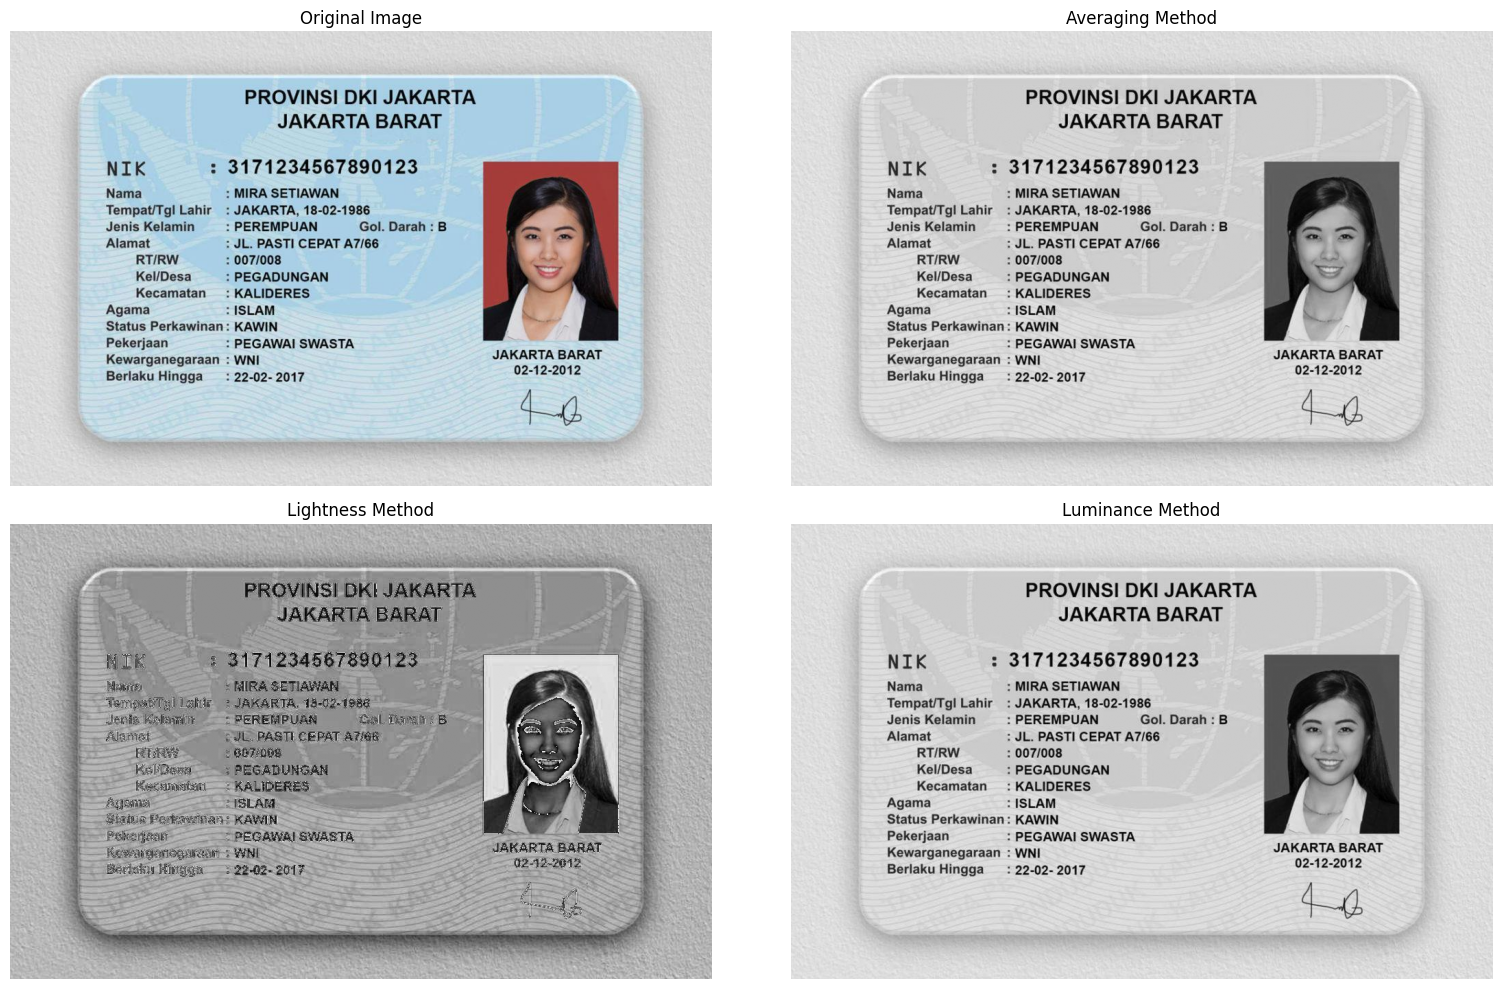

In [ ]:
# TUGAS 4: TRANSFORMASI GRAYSCALE
def grayscale_transforms():
    print("=== TRANSFORMASI GRAYSCALE ===")

    # Load image
    original = cv.imread('/content/drive/MyDrive/Images/unnamed.jpg')

    # Initialize grayscale images
    gray_avg = np.zeros((original.shape[0], original.shape[1]), dtype=np.uint8)
    gray_lightness = np.zeros((original.shape[0], original.shape[1]), dtype=np.uint8)
    gray_luminance = np.zeros((original.shape[0], original.shape[1]), dtype=np.uint8)

    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            # Extract RGB values (OpenCV uses BGR format)
            b, g, r = original[i,j]

            # Method 1: Averaging - (R + G + B) / 3
            gray_avg[i,j] = np.clip(int((int(r) + int(g) + int(b)) / 3), 0, 255)


            # Method 2: Lightness - (max(R,G,B) + min(R,G,B)) / 2
            gray_lightness[i,j] = np.clip(int((max(r,g,b) + min(r,g,b)) / 2), 0, 255)


            # Method 3: Luminance - 0.21*r + 0.72*g + 0.07*b
            gray_luminance[i,j] = np.clip(int(0.21*r + 0.72*g + 0.07*b), 0, 255)


    # Display results
    plt.figure(figsize=(16, 10))

    plt.subplot(2,2,1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2,2,2)
    plt.imshow(gray_avg, cmap='gray')
    plt.title('Averaging Method')
    plt.axis('off')

    plt.subplot(2,2,3)
    plt.imshow(gray_lightness, cmap='gray')
    plt.title('Lightness Method')
    plt.axis('off')

    plt.subplot(2,2,4)
    plt.imshow(gray_luminance, cmap='gray')
    plt.title('Luminance Method')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

grayscale_transforms()

=== SELECTIVE COLOR GRAYSCALE ===
Menampilkan warna biru dan mengubah warna lain ke grayscale


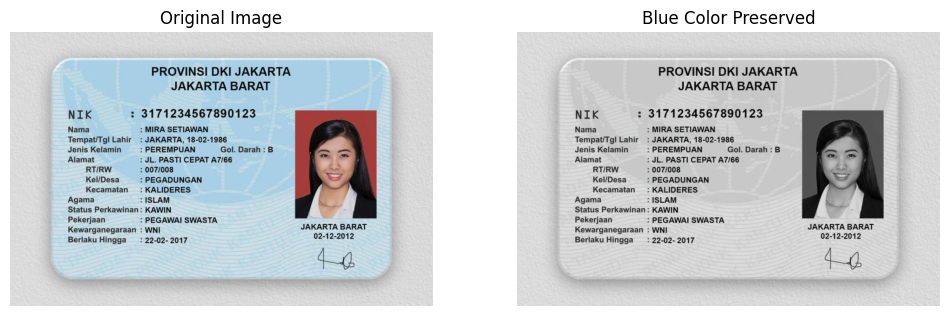

In [ ]:
# TUGAS 5: COLOR SELECTIVE GRAYSCALE
def selective_color_grayscale():
    print("=== SELECTIVE COLOR GRAYSCALE ===")
    print("Menampilkan warna biru dan mengubah warna lain ke grayscale")

    # Load image
    original = cv.imread('/content/drive/MyDrive/Images/unnamed.jpg')
    selective_img = np.zeros(original.shape, original.dtype)

    # Define blue color range (in BGR format)
    lower_blue = np.array([100, 0, 0])    # Lower bound for blue
    upper_blue = np.array([255, 100, 100])  # Upper bound for blue

    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            b, g, r = original[i,j]

            # Check if pixel is blue
            if (b >= lower_blue[0] and b <= upper_blue[0] and
                g >= lower_blue[1] and g <= upper_blue[1] and
                r >= lower_blue[2] and r <= upper_blue[2]):
                # Keep original blue color
                selective_img[i,j] = original[i,j]
            else:
                # Convert to grayscale using luminance method
                gray_value = np.clip(int(0.21*r + 0.72*g + 0.07*b), 0, 255)
                selective_img[i,j] = [gray_value, gray_value, gray_value]

    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(selective_img, cv.COLOR_BGR2RGB))
    plt.title('Blue Color Preserved')
    plt.axis('off')
    plt.show()

selective_color_grayscale()

In [ ]:
# Call the image processing functions
# linear_brightness_transform()
# inverse_image()
# contrast_transform()
# logarithmic_brightness()
# grayscale_transforms()
# selective_color_grayscale()

=== GAMMA CORRECTION ===
Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


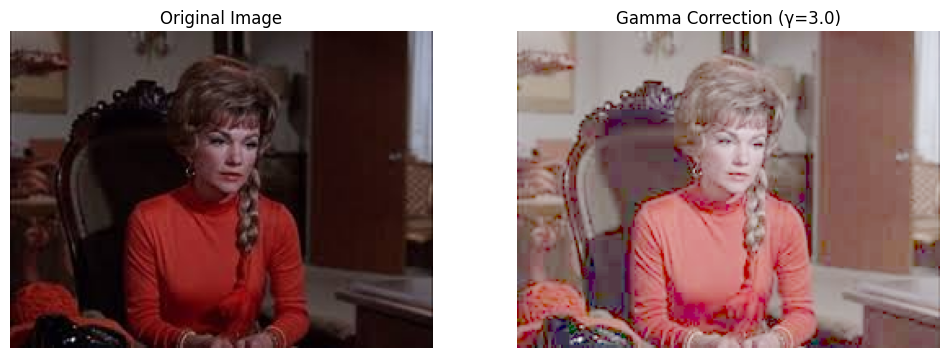

In [ ]:
# =============================================================================
# D2. OPERASI ARITMATIKA DAN LOGIKA
# =============================================================================

# TUGAS 1: GAMMA CORRECTION
def gamma_correction():
    print("=== GAMMA CORRECTION ===")
    print('Gamma Correction pada citra')
    print('----------------------------------')
    try:
        gamma = float(input('Masukkan nilai Gamma: '))
    except ValueError:
        print('Error, not a number')
        return

    # Load image
    original = cv.imread('/content/drive/MyDrive/Images/female.jpg')
    gamma_img = np.zeros(original.shape, original.dtype)

    # Apply gamma correction
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            for k in range(original.shape[2]):
                # Gamma correction formula: I' = 255 * (I/255)^(1/gamma)
                normalized = original[i,j,k] / 255.0
                corrected = 255 * (normalized ** (1.0/gamma))
                gamma_img[i,j,k] = int(corrected)

    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(gamma_img, cv.COLOR_BGR2RGB))
    plt.title(f'Gamma Correction (γ={gamma})')
    plt.axis('off')
    plt.show()

gamma_correction()

In [1]:

# TUGAS 2: BIT DEPTH SIMULATION
def bit_depth_simulation():
    print("=== SIMULASI BIT DEPTH ===")
    bit_depth = int(input('Masukkan bit depth (1-7): '))

    # Calculate level
    level = 255 / (pow(2, bit_depth) - 1)

    # Load image as grayscale
    original = cv.imread('/content/drive/MyDrive/Images/female.jpg', cv.IMREAD_GRAYSCALE)
    depth_image = np.zeros(original.shape, original.dtype)

    # Apply bit depth reduction
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            # Formula: C' = round((C/level) * level)
            depth_image[i,j] = int(round((original[i,j] / level)) * level)

    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image (8-bit)')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(depth_image, cmap='gray')
    plt.title(f'{bit_depth}-bit Depth Simulation')
    plt.axis('off')
    plt.show()

    print(f"Bit depth: {bit_depth}")
    print(f"Color levels: {pow(2, bit_depth)}")
    print(f"Level value: {level:.2f}")

# PSNR Function
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # MSE 0 means no noise, PSNR has no meaning
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


In [ ]:

# TUGAS 3: AVERAGE DENOISING
def average_denoising():
    print("=== AVERAGE DENOISING ===")

    # Load original image
    original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

    # Load all noisy images
    cv_img = []
    for img in glob.glob('/content/drive/MyDrive/Images/noises'):
        n = cv.imread(img)
        g = cv_img.append(n)

    print(f"Total noisy images loaded: {len(cv_img)}")

    # Test different numbers of images for averaging
    test_counts = [10, 20, 40, 80, 100]
    results = []

    plt.figure(figsize=(20, 4))

    for idx, count in enumerate(test_counts):
        if count <= len(cv_img):
            # Average the first 'count' images
            averaged_img = np.zeros(cv_img[0].shape, dtype=np.float64)

            for i in range(count):
                averaged_img += cv_img[i].astype(np.float64)

            averaged_img = (averaged_img / count).astype(np.uint8)

            # Calculate PSNR
            psnr_value = PSNR(original, averaged_img)
            results.append((count, psnr_value))

            # Display result
            plt.subplot(1, 6, idx+1)
            plt.imshow(cv.cvtColor(averaged_img, cv.COLOR_BGR2RGB))
            plt.title(f'{count} images\nPSNR: {psnr_value:.2f} dB')
            plt.axis('off')

    # Show original for comparison
    plt.subplot(1, 6, 6)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print results table
    print("\n=== HASIL PSNR ===")
    print("No. | Jumlah Citra | PSNR (dB)")
    print("----|--------------|----------")
    for i, (count, psnr) in enumerate(results, 1):
        print(f"{i:2d}  | {count:11d}  | {psnr:8.2f}")

    print("\nKesimpulan:")
    print("Semakin banyak citra yang digunakan untuk averaging, semakin tinggi nilai PSNR.")
    print("Hal ini menunjukkan bahwa kualitas citra hasil denoising semakin baik.")
    print("Noise yang bersifat random akan saling meniadakan ketika di-average,")
    print("sehingga citra hasil denoising mendekati citra asli.")


=== GAMMA CORRECTION ===
Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 2


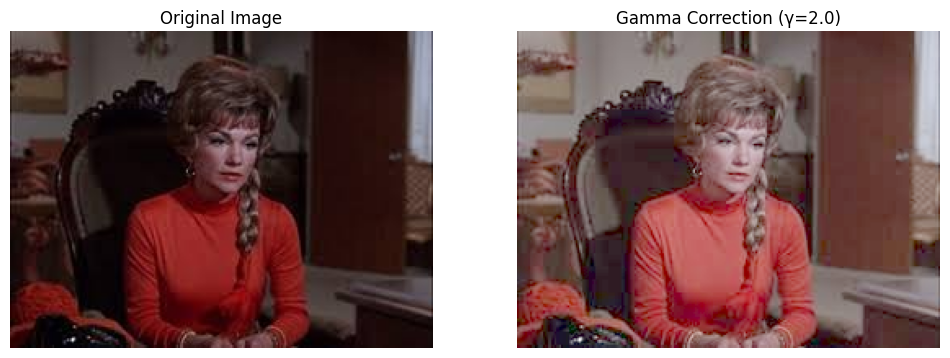

In [ ]:
# TUGAS 1: GAMMA CORRECTION
def gamma_correction():
    print("=== GAMMA CORRECTION ===")
    print('Gamma Correction pada citra')
    print('----------------------------------')
    try:
        gamma = float(input('Masukkan nilai Gamma: '))
    except ValueError:
        print('Error, not a number')
        return

    # Load image
    original = cv.imread('/content/drive/MyDrive/Images (1)/female.jpg')
    if original is None:
        print("Error loading image: /content/drive/MyDrive/Images (1)/female.jpg")
        return
    gamma_img = np.zeros(original.shape, original.dtype)

    # Apply gamma correction
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            for k in range(original.shape[2]):
                # Gamma correction formula: I' = 255 * (I/255)^(1/gamma)
                normalized = original[i,j,k] / 255.0
                corrected = 255 * (normalized ** (1.0/gamma))
                gamma_img[i,j,k] = int(corrected)

    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(gamma_img, cv.COLOR_BGR2RGB))
    plt.title(f'Gamma Correction (γ={gamma})')
    plt.axis('off')
    plt.show()

gamma_correction()

=== SIMULASI BIT DEPTH ===
Masukkan bit depth (1-7): 2


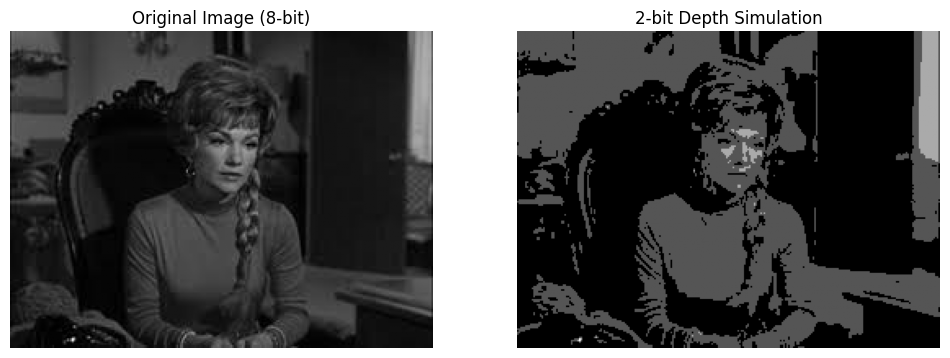

Bit depth: 2
Color levels: 4
Level value: 85.00


In [ ]:
# TUGAS 2: BIT DEPTH SIMULATION
def bit_depth_simulation():
    print("=== SIMULASI BIT DEPTH ===")
    bit_depth = int(input('Masukkan bit depth (1-7): '))

    # Calculate level
    level = 255 / (pow(2, bit_depth) - 1)

    # Load image as grayscale
    original = cv.imread('/content/drive/MyDrive/Images (1)/female.jpg', cv.IMREAD_GRAYSCALE)
    if original is None:
        print("Error loading image: /content/drive/MyDrive/Images (1)/female.jpg")
        return
    depth_image = np.zeros(original.shape, original.dtype)

    # Apply bit depth reduction
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            # Formula: C' = round((C/level) * level)
            depth_image[i,j] = int(round((original[i,j] / level)) * level)

    # Display results
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image (8-bit)')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(depth_image, cmap='gray')
    plt.title(f'{bit_depth}-bit Depth Simulation')
    plt.axis('off')
    plt.show()

    print(f"Bit depth: {bit_depth}")
    print(f"Color levels: {pow(2, bit_depth)}")
    print(f"Level value: {level:.2f}")

# PSNR Function
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # MSE 0 means no noise, PSNR has no meaning
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

bit_depth_simulation()

=== AVERAGE DENOISING ===
Total noisy images loaded: 100


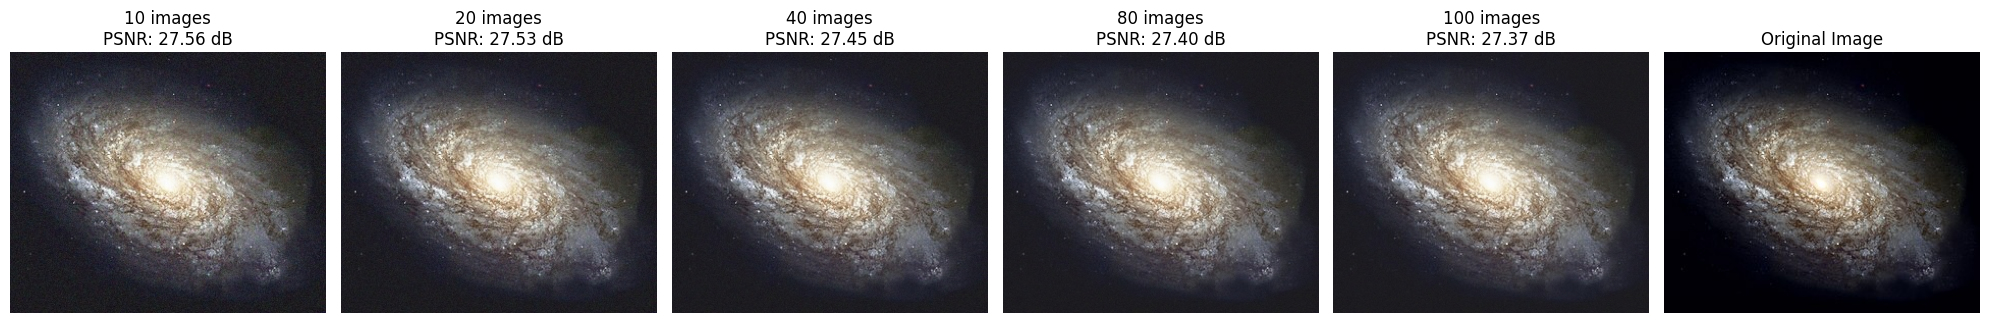


=== HASIL PSNR ===
No. | Jumlah Citra | PSNR (dB)
----|--------------|----------
 1  |          10  |    27.56
 2  |          20  |    27.53
 3  |          40  |    27.45
 4  |          80  |    27.40
 5  |         100  |    27.37

Kesimpulan:
Semakin banyak citra yang digunakan untuk averaging, semakin tinggi nilai PSNR.
Hal ini menunjukkan bahwa kualitas citra hasil denoising semakin baik.
Noise yang bersifat random akan saling meniadakan ketika di-average,
sehingga citra hasil denoising mendekati citra asli.


In [ ]:
# TUGAS 3: AVERAGE DENOISING
def average_denoising():
    print("=== AVERAGE DENOISING ===")

    # Load original image
    original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
    if original is None:
        print("Error loading image: /content/drive/MyDrive/Images/galaxy.jpg")
        return

    # Load all noisy images
    cv_img = []
    for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'): # Corrected glob pattern
        n = cv.imread(img)
        if n is not None: # Add check for successful image loading
            cv_img.append(n)


    print(f"Total noisy images loaded: {len(cv_img)}")

    # Test different numbers of images for averaging
    test_counts = [10, 20, 40, 80, 100]
    results = []

    plt.figure(figsize=(20, 4))

    # Only iterate up to the number of loaded images
    for idx in range(min(len(test_counts), len(cv_img))):
        count = test_counts[idx]
        # Average the first 'count' images
        averaged_img = np.zeros(cv_img[0].shape, dtype=np.float64)

        for i in range(count):
            averaged_img += cv_img[i].astype(np.float64)

        averaged_img = (averaged_img / count).astype(np.uint8)

        # Calculate PSNR
        psnr_value = PSNR(original, averaged_img)
        results.append((count, psnr_value))

        # Display result
        plt.subplot(1, 6, idx+1)
        plt.imshow(cv.cvtColor(averaged_img, cv.COLOR_BGR2RGB))
        plt.title(f'{count} images\nPSNR: {psnr_value:.2f} dB')
        plt.axis('off')

    # Show original for comparison
    plt.subplot(1, 6, 6)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print results table
    print("\n=== HASIL PSNR ===")
    print("No. | Jumlah Citra | PSNR (dB)")
    print("----|--------------|----------")
    for i, (count, psnr) in enumerate(results, 1):
        print(f"{i:2d}  | {count:11d}  | {psnr:8.2f}")

    print("\nKesimpulan:")
    print("Semakin banyak citra yang digunakan untuk averaging, semakin tinggi nilai PSNR.")
    print("Hal ini menunjukkan bahwa kualitas citra hasil denoising semakin baik.")
    print("Noise yang bersifat random akan saling meniadakan ketika di-average,")
    print("sehingga citra hasil denoising mendekati citra asli.")

average_denoising()

=== IMAGE MASKING ===


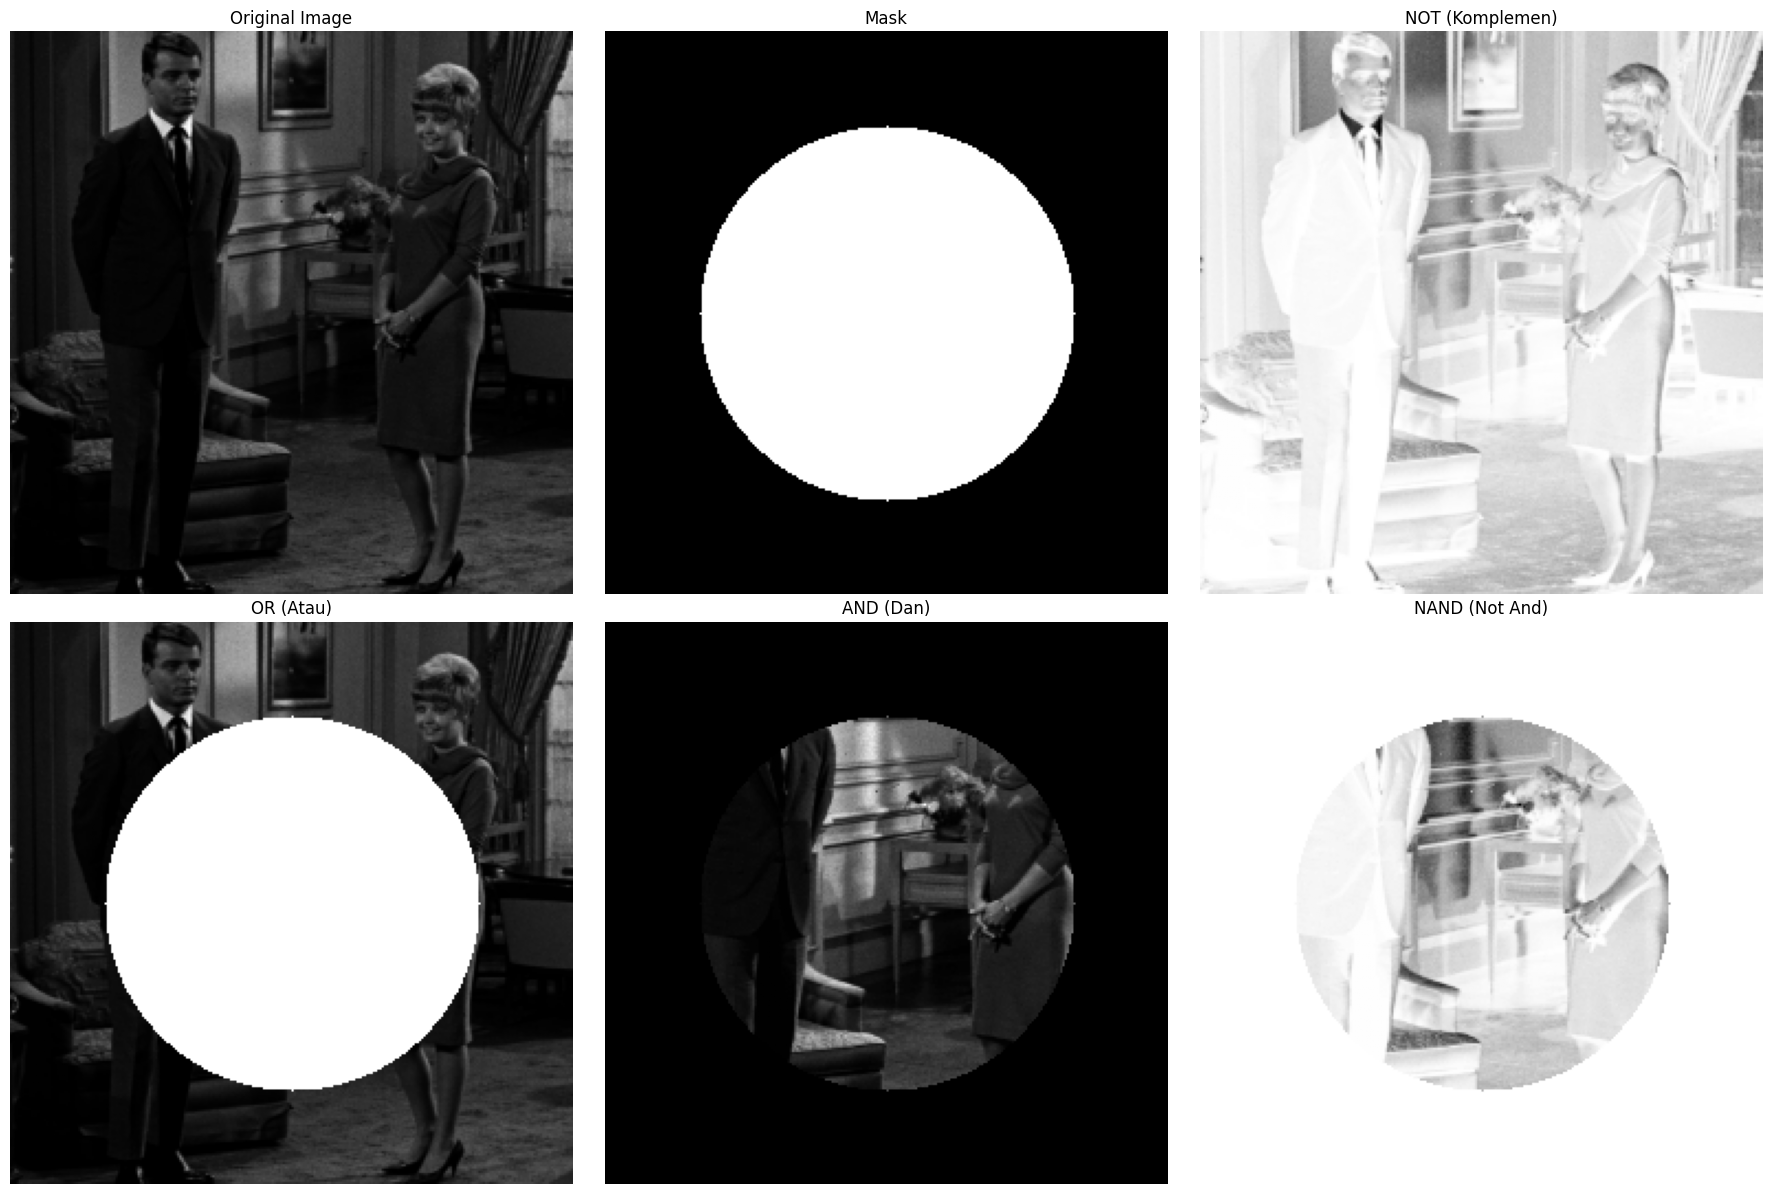


=== ANALISA HASIL ===
1. NOT (Komplemen): Membalik semua nilai pixel (hitam jadi putih, putih jadi hitam)
2. OR (Atau): Menghasilkan pixel putih jika salah satu input putih
3. AND (Dan): Menghasilkan pixel putih hanya jika kedua input putih
4. NAND (Not And): Kebalikan dari operasi AND
5. XOR (Exclusive Or): Menghasilkan pixel putih jika input berbeda


In [ ]:
# TUGAS 4: IMAGE MASKING
def image_masking():
    print("=== IMAGE MASKING ===")

    # Load images
    original = cv.imread('/content/drive/MyDrive/Images/couple.tiff', cv.IMREAD_GRAYSCALE)
    if original is None:
        print("Error loading image: /content/drive/MyDrive/Images/couple.tiff")
        return

    # Create a simple mask (you can modify this based on your needs)
    # For demonstration, creating a circular mask
    mask = np.zeros(original.shape[:2], dtype=np.uint8)
    center = (original.shape[1]//2, original.shape[0]//2)
    radius = min(original.shape[:2])//3
    cv.circle(mask, center, radius, 255, -1)

    # Apply different logical operations
    operations = {
        'NOT (Komplemen)': cv.bitwise_not(original),
        'OR (Atau)': cv.bitwise_or(original, mask),
        'AND (Dan)': cv.bitwise_and(original, mask),
        'NAND (Not And)': cv.bitwise_not(cv.bitwise_and(original, mask)),
        'XOR (Exclusive Or)': cv.bitwise_xor(original, mask)
    }

    # Display results
    plt.figure(figsize=(18, 12))

    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Mask
    plt.subplot(2, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    # Apply operations
    plot_idx = 3
    for op_name, result in operations.items():
        plt.subplot(2, 3, plot_idx)
        plt.imshow(result, cmap='gray')
        plt.title(op_name)
        plt.axis('off')
        plot_idx += 1
        if plot_idx > 6:
            break

    plt.tight_layout()
    plt.show()

    print("\n=== ANALISA HASIL ===")
    print("1. NOT (Komplemen): Membalik semua nilai pixel (hitam jadi putih, putih jadi hitam)")
    print("2. OR (Atau): Menghasilkan pixel putih jika salah satu input putih")
    print("3. AND (Dan): Menghasilkan pixel putih hanya jika kedua input putih")
    print("4. NAND (Not And): Kebalikan dari operasi AND")
    print("5. XOR (Exclusive Or): Menghasilkan pixel putih jika input berbeda")
image_masking()